# Tutorial: Evaluating algorithmic fairness with the MADD

We show an example of a use case with some data and a random model.

In [1]:
from maddlib import evaluation
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression

## 0. Preliminaries

### 0.1. Get data

In [2]:
# Load train and test sets
X_train = pd.read_csv("./data/X_train.csv")
X_test = pd.read_csv("./data/X_test.csv")
y_train = pd.read_csv("./data/y_train.csv")
y_test = pd.read_csv("./data/y_test.csv")

In [3]:
X_train.head()

,gender,highest_education,poverty,age,disability,num_of_prev_attempts,studied_credits,sum_click
0,0.0,0.50,1.0,0.0,0.0,0.000000,0.05,0.125404
1,1.0,0.50,1.0,0.0,0.0,0.000000,0.10,0.130624
2,1.0,0.25,0.0,0.0,0.0,0.000000,0.05,0.026597
3,1.0,0.25,1.0,0.0,1.0,0.000000,0.15,0.045447
4,1.0,0.50,1.0,0.0,1.0,0.166667,0.05,0.059574


In [4]:
y_train.head()

,final_result
0,1.0
1,1.0
2,0.0
3,0.0
4,0.0


### 0.2. Train a model

In [5]:
# Training phase: Fit a classifier
clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train.values.ravel())

LogisticRegression(random_state=0)

### 0.3. Get the predicted probabilities

In [6]:
# Testing phase: Get the predicted probabilities of positive predictions
y_pp = clf.predict_proba(X_test)[:, 1] 

## 1. Fairness evaluation with the MADD

### 1.1. MADD values

**N.B.:** You can enter a numerical bandwidth `h` $\in ]0, 1[ $ or set it to `'auto'` (see the notebook `madd_optimal_bandwidth.ipynb`).

#### A. Two groups based on a single feature

In [7]:
# Choose an individual sensitive feature (that should be binary)
sensitive_feature = "gender"

# Compute the MADD
madd = evaluation.MADD(h='auto', X_test=X_test, pred_proba=y_pp, sf=sensitive_feature)
print("MADD:", madd)

MADD: 0.4653702883582405


#### B. Two groups from several features

In [8]:
# Intersectional groups from gender and disability features

# Get indexes of both groups
ind_women_disabled = X_test[(X_test['gender'] == 0) & (X_test['disability'] == 1)].index
ind_men_disabled = X_test[(X_test['gender'] == 1) & (X_test['disability'] == 1)].index

# Get their predicted probabilities
y_pp_women_disabled = y_pp[ind_women_disabled]
y_pp_men_disabled = y_pp[ind_men_disabled]

# Compute the MADD
madd = evaluation.MADD(h='auto', pred_proba_sf0=y_pp_women_disabled, pred_proba_sf1=y_pp_men_disabled)
print("MADD:", madd)

MADD: 1.1184960582171013


### 1.2. MADD plots

#### A. Two groups based on a single feature

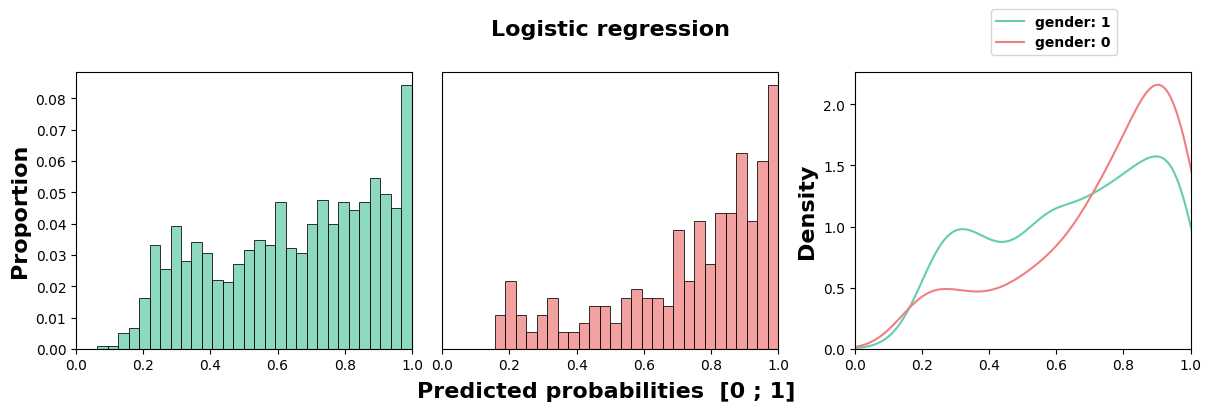

In [9]:
# Get their predicted probabilities
y_pp_sf0, y_pp_sf1 = evaluation.separate_pred_proba(X_test, y_pp, sensitive_feature)

# Plot
evaluation.madd_plot(0.03, y_pp_sf0, y_pp_sf1, sensitive_feature, "Logistic regression")

#### B. Two groups from several features

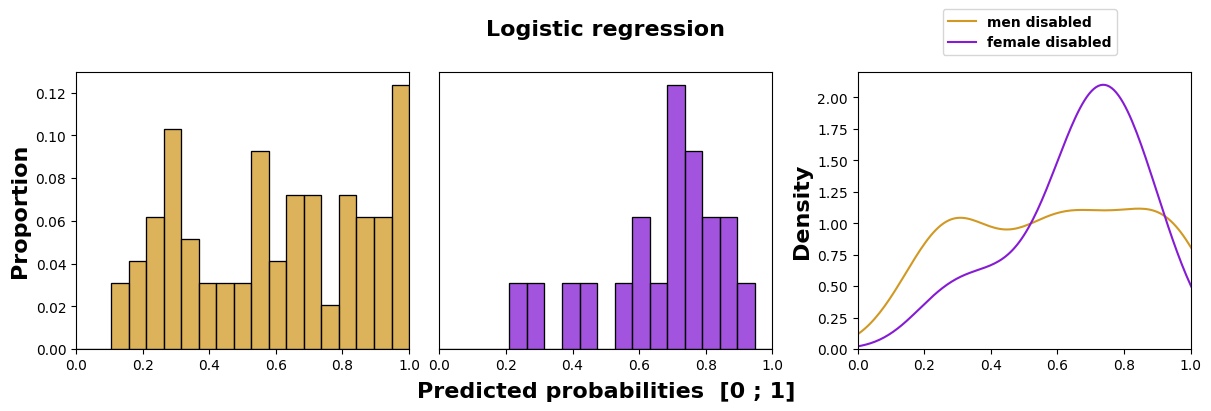

In [10]:
# Plot
evaluation.madd_plot(0.05, y_pp_women_disabled, y_pp_men_disabled, ("female disabled", "men disabled"), "Logistic regression")